In [1]:
!pip install qiskit-machine-learning

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from qiskit.utils import algorithm_globals
from qiskit.circuit.library import ZZFeatureMap
from qiskit.circuit.library import RealAmplitudes
from sklearn.preprocessing import OneHotEncoder
from qiskit import BasicAer, execute
from qiskit.algorithms.optimizers import SPSA
from qiskit_machine_learning.algorithms.classifiers import VQC

C:\Users\Admin\AppData\Local\Temp\ipykernel_6092\730998099.py:15: DeprecationWarning: ``qiskit.algorithms`` has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. The ``qiskit.algorithms`` import path is deprecated as of qiskit-terra 0.25.0 and will be removed no earlier than 3 months after the release date. Please run ``pip install qiskit_algorithms`` and use ``import qiskit_algorithms`` instead.
  from qiskit.algorithms.optimizers import SPSA


In [3]:
data = load_breast_cancer()

In [4]:
df = pd.DataFrame(data = data.data, columns=data.feature_names)
df['target'] = data.target
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [5]:
x = df.drop(['target'], axis=1)
y = df['target']

In [6]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
pca = PCA(n_components=2)
x = pca.fit_transform(x)
print(pca.explained_variance_ratio_)

[0.44272026 0.18971182]


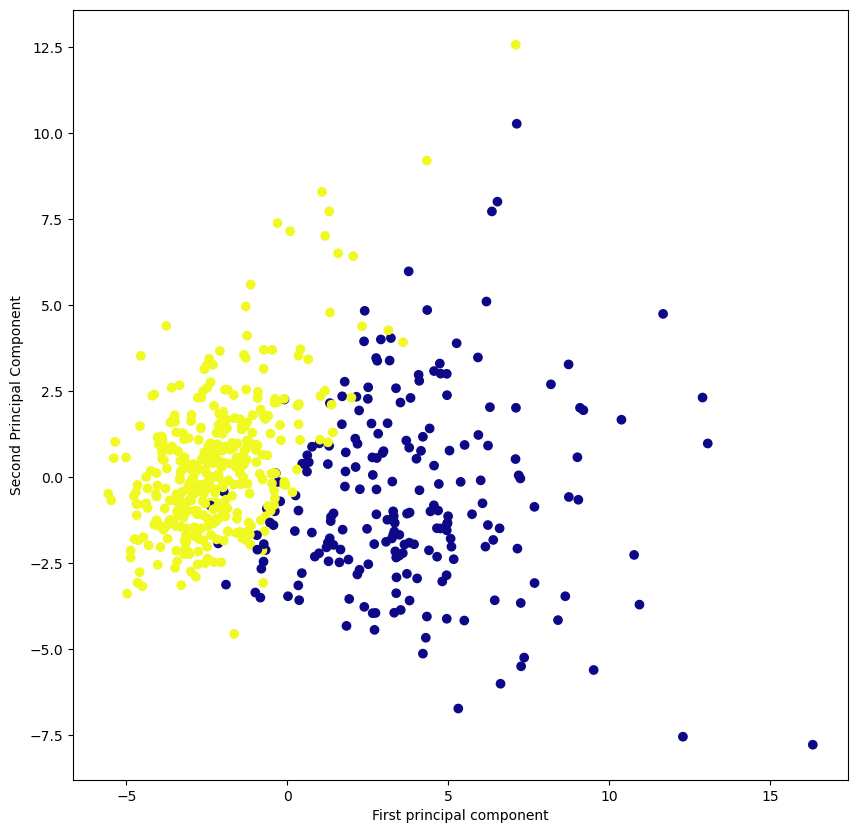

In [7]:
plt.figure(figsize=(10,10))
plt.scatter(x[:,0], x[:,1], c=y, cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.show()

In [8]:
x = MinMaxScaler().fit_transform(x)

In [9]:
algorithm_globals.random_seed = 1234
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=algorithm_globals.random_seed )

C:\Users\Admin\AppData\Local\Temp\ipykernel_6092\2232503955.py:1: DeprecationWarning: The property ``qiskit.utils.algorithm_globals.QiskitAlgorithmGlobals.random_seed`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. This algorithm utility has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. You can run ``pip install qiskit_algorithms`` and import ``from qiskit_algorithms.utils`` instead. 
  algorithm_globals.random_seed = 1234
C:\Users\Admin\AppData\Local\Temp\ipykernel_6092\2232503955.py:2: DeprecationWarning: The property ``qiskit.utils.algorithm_globals.QiskitAlgorithmGlobals.random_seed`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. This algorithm utility has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. You can run ``pip install qiskit_algorithms`` and import ``from qiskit_

In [10]:
!pip install pylatexenc

C:\Users\Admin\anaconda3\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


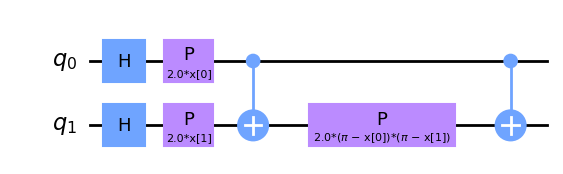

In [11]:
num_features = x_train.shape[1]
features_map = ZZFeatureMap(num_features, reps=1)
features_map.decompose().draw(output='mpl', fold=20, filename='circuit.png')

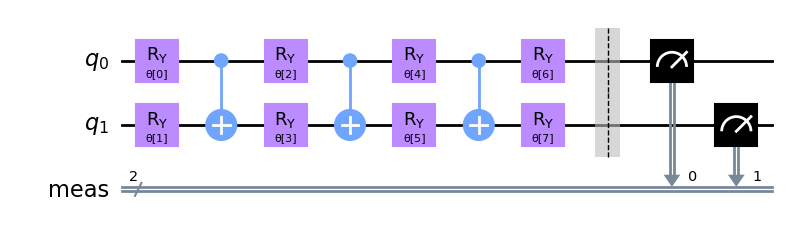

In [12]:
anzsatze = RealAmplitudes(num_features, reps=3)
anzsatze.measure_all()
anzsatze.decompose().draw(output='mpl', fold=20, filename='anzsatze.png')

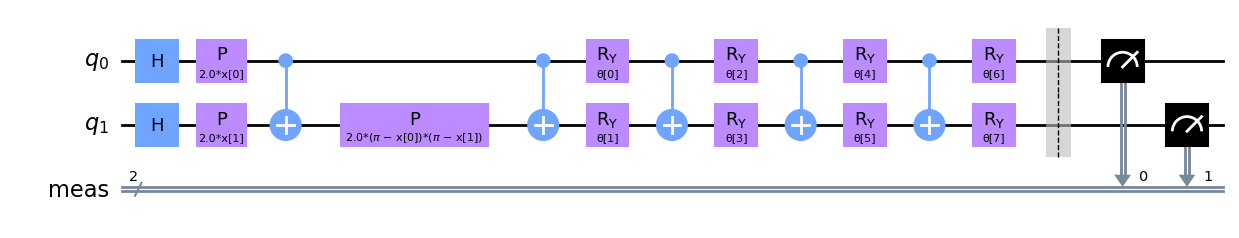

In [13]:
circuit = features_map.compose(anzsatze)
circuit.decompose().draw(output='mpl', filename='all.png')

In [14]:
initial_point = np.random.random(anzsatze.num_parameters)
print(initial_point)

[0.53291178 0.26384984 0.18747906 0.8007535  0.05487198 0.36830274
 0.77571411 0.92537829]


In [15]:
encoder = OneHotEncoder()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

y_train_oh = encoder.fit_transform(y_train.reshape(-1,1)).toarray()
y_test_oh = encoder.fit_transform(y_test.reshape(-1,1)).toarray()

In [16]:
!pip install qiskit-aer

In [20]:
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
from qiskit import BasicAer
from qiskit_machine_learning.algorithms.classifiers import VQC
from qiskit.algorithms.optimizers import SPSA
feature_map = ZZFeatureMap(feature_dimension=2, reps=2)
ansatz = RealAmplitudes(num_qubits=2, reps=2)
vqc = VQC(feature_map=feature_map, ansatz=ansatz, loss='cross_entropy', optimizer=SPSA())
backend = BasicAer.get_backend('qasm_simulator')
vqc.quantum_instance = backend

In [22]:
vqc.fit(x_train, y_train_oh)

In [23]:
print(f'Training accuracy: {vqc.score(x_train, y_train_oh):.2f}')

Training accuracy: 0.83


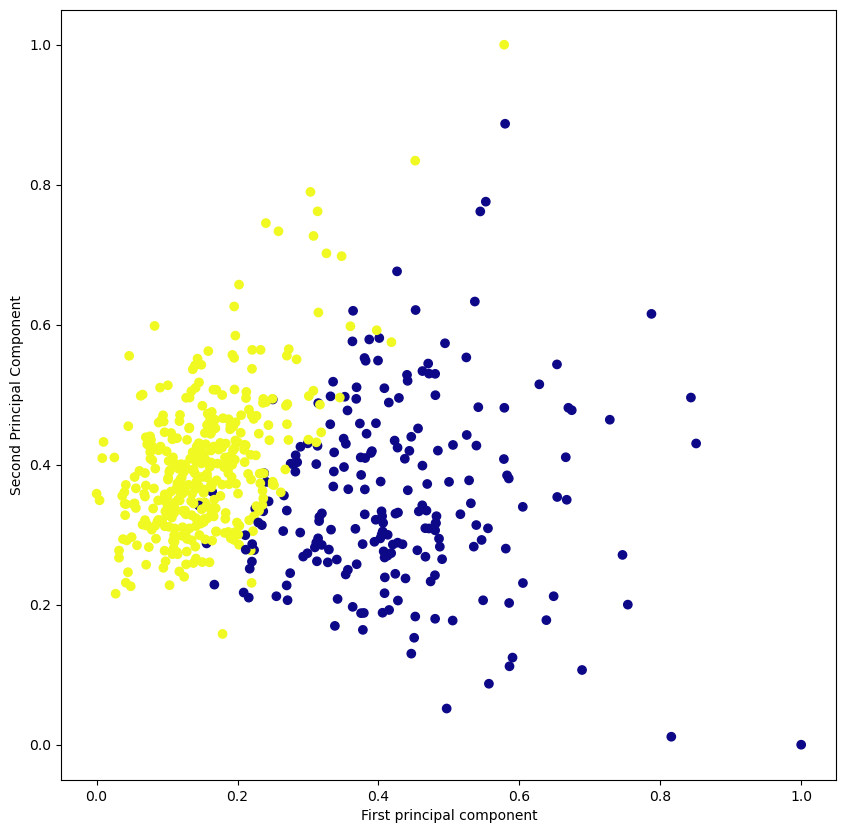

In [24]:
plt.figure(figsize=(10,10))
plt.scatter(x[:,0], x[:,1], c=y, cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.show()